In [1]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), 177.08 MiB | 14.45 MiB/s, done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [2]:
!ls pubmed-rct/PubMed_200k_RCT_numbers_replaced_with_at_sign
# dev is text file for validation set

dev.txt  test.txt  train.zip


In [3]:
data_dir="/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [4]:
#  preprocess data
def line(filename):
  '''Reads filename and returns lines of text in that file as a list. '''
  with (open(filename,"r")) as f:
    return f.readlines()

In [5]:
train_lines=line(data_dir+"train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [6]:
len(train_lines)

210040

In [10]:
def preprocess_text(filename):
  lines=line(filename)
  abstract_data=[]
  count=0
  for abs_line in lines:
    if abs_line.startswith("###"):
      abstract_id=abs_line

    elif abs_line.isspace()==False:
      line_data={}
      target_text=abs_line.split("\t")
      line_data["line_number"]=count
      line_data["target"]=target_text[0]
      line_data["text"]=target_text[1].lower()
      abstract_data.append(line_data)
      count+=1

    else:
      total=count
      for a in abstract_data[-total:len(abstract_data)]:
        a["total_lines"]=total
      count=0
  
  return abstract_data

In [11]:
%%time
train_samples=preprocess_text(data_dir+"train.txt")
test_samples=preprocess_text(data_dir+"test.txt")
val_samples=preprocess_text(data_dir+"dev.txt")
len(train_samples),len(val_samples),len(test_samples)

CPU times: user 290 ms, sys: 80.6 ms, total: 370 ms
Wall time: 374 ms


(180040, 30212, 30135)

In [12]:
train_samples[:15]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .\n',
  'total_lines': 12},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
  'total_lines': 12},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
  'total_lines': 12},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
  'total_lines': 12},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures

In [13]:
import pandas as pd
train_df=pd.DataFrame(train_samples)
test_df=pd.DataFrame(test_samples)
val_df=pd.DataFrame(val_samples)
train_df

,line_number,target,text,total_lines
0,0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,12
1,1,METHODS,a total of @ patients with primary knee oa wer...,12
2,2,METHODS,outcome measures included pain reduction and i...,12
3,3,METHODS,pain was assessed using the visual analog pain...,12
4,4,METHODS,secondary outcome measures included the wester...,12
...,...,...,...,...
180035,7,RESULTS,for the absolute change in percent atheroma vo...,12
180036,8,RESULTS,"for pav , a significantly greater percentage o...",12
180037,9,RESULTS,both strategies had acceptable side effect pro...,12
180038,10,CONCLUSIONS,"compared with standard statin monotherapy , th...",12


In [14]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

In [15]:
train_sentences=train_df["text"].tolist()
val_sentences=val_df["text"].tolist()
test_sentences=test_df["text"].tolist()
train_sentences[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .\n',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .\n']

In [16]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
train_label_encoded=encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
val_label_encoded=encoder.transform(val_df["target"].to_numpy().reshape(-1,1))
test_label_encoded=encoder.transform(test_df["target"].to_numpy().reshape(-1,1))

train_label_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train_label_encode=encoder.fit_transform(train_df["target"].to_numpy())
test_label_encode=encoder.transform(test_df["target"].to_numpy())
val_label_encode=encoder.transform(val_df["target"].to_numpy())

train_label_encode

array([3, 2, 2, ..., 4, 1, 1])

In [18]:
encoder.classes_

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

> ### Baseline model: TF-IDF Multinomial Naive Bayes classifier

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model0=Pipeline([
    ("tfidf",TfidfVectorizer()),
    ("clf",MultinomialNB())
])
model0.fit(train_sentences,train_label_encode)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [20]:
model0.score(val_sentences,val_label_encode)

0.7218323844829869

In [21]:
y_pred0=model0.predict(val_sentences)
y_pred0

array([4, 1, 3, ..., 4, 4, 1])

In [22]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
def result(y_true,y_pred):
  accuracy=accuracy_score(y_true,y_pred)*100
  precision,recall,f1_score,_=precision_recall_fscore_support(y_true,y_pred,average="weighted")
  model_result={
      "accuracy":accuracy,
      "precision":precision,
      "reacall":recall,
      "f1-score": f1_score
  }
  return model_result


In [23]:
model0_results=result(val_label_encode,y_pred0)
model0_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'reacall': 0.7218323844829869,
 'f1-score': 0.6989250353450294}

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers


In [25]:
#  how long are the sentenceson average
sent=[len(sentence.split()) for sentence in train_sentences]
np.mean(sent)

26.338269273494777

>> **We need to take care of sentence lenght we set for vectorization layer as too short will lead to loss of info and too large will create a large dataset having just zeroes on every sentence's head and tail.**

In [26]:
#  how long sentence length is for 95% of trainin set
int (np.percentile(sent,95))

55

In [27]:
max(sent)

296

In [28]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# in paper it is given that for 20k dataset max vocab is 68k.
text_vectorizer=TextVectorization(max_tokens=68000,
                                  output_sequence_length=55)



In [29]:
text_vectorizer.adapt(train_sentences)

In [30]:
import random 
target_sentence=random.choice(train_sentences)
print(f"Text: \n {target_sentence}")
print(f"Length of text: {len(target_sentence.split())}")
print(f"Vectorized text: {text_vectorizer(target_sentence)}")

Text: 
 fluoroscopy is inaccurate and modestly reproducible when assessing lv and rv lead positions in a standard ventricular segmentation when compared with cardiac ct. .

Length of text: 24
Vectorized text: [ 3625    20 14873     3  5899  7791   183  1332  1281     3  2467   944
  3617     5     8   165   773  7786   183    34     7   342   663     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0]


In [31]:
rct_20k=text_vectorizer.get_vocabulary()
print(f"Number of words in vocab: {len(rct_20k)}")
print(f"Most common words: {rct_20k[:5]}")
print(f"Least common words: {rct_20k[:-5]}")

Number of words in vocab: 64841
Most common words: ['', '[UNK]', 'the', 'and', 'of']
Least common words: ['', '[UNK]', 'the', 'and', 'of', 'in', 'to', 'with', 'a', 'were', 'was', 'for', 'patients', 'group', 'p', 'at', 'or', 'study', 'on', 'treatment', 'is', 'after', 'by', 'this', 'groups', 'as', 'an', 'from', 'that', 'randomized', 'between', 'not', 'trial', 'no', 'compared', 'control', 'be', 'significant', 'intervention', 'significantly', 'n', 'months', 'than', 'we', 'vs', 'rsb', 'lsb', 'clinical', 'placebo', 'baseline', 'ci', 'two', 'during', 'weeks', 'both', 'had', 'primary', 'mean', 'are', 'using', 'participants', 'there', 'all', 'time', 'years', 'pain', 'therapy', 'who', 'mg', 'more', 'effect', 'effects', 'but', 'risk', 'difference', 'outcomes', 'total', 'care', 'rate', 'efficacy', 'received', 'associated', 'higher', 'respectively', 'days', 'analysis', 'outcome', 'use', 'one', 'week', 'women', 'may', 'randomly', 'levels', 'followup', 'will', 'increased', 'health', 'used', 'have', '

***In this we got vocab length to be less than max_tokens which means that vectorizer has covered every unique word and mapped it to integers.*** 
> But why do we got differnt value than given in paper?
>>Its because we are here using replaced with @ text files

> ### Embedding layer

In [32]:
token_embed=layers.Embedding(input_dim=len(rct_20k),
                             output_dim=128,
                             mask_zero=True, # it is basically used to improve computing power comes in handy if we have lots of zeros due to padding)
                             name="token_embedding")

In [33]:
print(f"Sentence before vectorization:\n {target_sentence}\n")
vectorized_sentence=text_vectorizer(target_sentence)
print(f"Sentence after vectorization:\n {vectorized_sentence}\n")
embedded_sentence=token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n {embedded_sentence}\n")
print(f"Embedded sentence shape:\n {embedded_sentence.shape}")
#  as the layer is not trained we can see that last values i.e zero in vectorized part are same in embedded sentence.

Sentence before vectorization:
 fluoroscopy is inaccurate and modestly reproducible when assessing lv and rv lead positions in a standard ventricular segmentation when compared with cardiac ct. .


Sentence after vectorization:
 [ 3625    20 14873     3  5899  7791   183  1332  1281     3  2467   944
  3617     5     8   165   773  7786   183    34     7   342   663     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0]

Sentence after embedding:
 [[-0.03428191  0.01191179  0.00954811 ...  0.04395543  0.0237941
  -0.00728039]
 [ 0.04621036  0.00569333 -0.04620999 ...  0.01920476 -0.04277234
   0.04505864]
 [-0.04174143  0.00041143 -0.00702182 ... -0.04664906 -0.01245899
   0.04894774]
 ...
 [-0.02499553  0.0398032   0.0189526  ...  0.03014029 -0.03033653
   0.00348632]
 [-0.02499553  0.0398032   0.0189526  ...  0.03014029 -0.03033653
   0.00348632

In [34]:
train_dataset=tf.data.Dataset.from_tensor_slices((train_sentences,train_label_encoded))
test_dataset=tf.data.Dataset.from_tensor_slices((test_sentences,test_label_encoded))
val_dataset=tf.data.Dataset.from_tensor_slices((val_sentences,val_label_encoded))
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [35]:
train_dataset=train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
# we are not shuffling our data here as we want it to learn the sequence of their occurences
val_dataset=val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

> ### Model1: Conv1D

In [36]:
inputs=layers.Input(shape=(1,),dtype=tf.string)
text_vectors=text_vectorizer(inputs)
embeddings=token_embed(text_vectors)
x=layers.Conv1D(64,kernel_size=5,padding="same",activation="relu")(embeddings)
x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(5,activation="softmax")(x)
model1=tf.keras.Model(inputs,outputs)

model1.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [37]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 55, 128)          8299648   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325   

In [38]:
len(train_dataset)

5627

In [39]:
history1=model1.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=3,
                    steps_per_epoch=int(0.1*len(train_dataset)), # this is used to determine whether everything is right or not in our starting experiments, int this it takes some amount of dataset in each epoch
                    validation_steps=int(0.2*len(val_dataset)))
#  now we can see that it runs on just 562 batches i.e. 10% of train_dataset per epoch

Epoch 1/3
562/562 [==============================] - 42s 58ms/step - loss: 0.9185 - accuracy: 0.6409 - val_loss: 0.6821 - val_accuracy: 0.7391
Epoch 2/3
562/562 [==============================] - 8s 15ms/step - loss: 0.6614 - accuracy: 0.7571 - val_loss: 0.6309 - val_accuracy: 0.7690
Epoch 3/3
562/562 [==============================] - 6s 11ms/step - loss: 0.6186 - accuracy: 0.7755 - val_loss: 0.5880 - val_accuracy: 0.7917


In [40]:
y_pred1=model1.predict(val_dataset)
y_pred1

945/945 [==============================] - 2s 2ms/step


array([[4.0291321e-01, 2.0009863e-01, 8.8363014e-02, 2.7058190e-01,
        3.8043249e-02],
       [4.0602469e-01, 3.2274610e-01, 1.0926401e-02, 2.5148192e-01,
        8.8209268e-03],
       [1.3646151e-01, 8.8682352e-03, 2.6822833e-03, 8.5193336e-01,
        5.4669410e-05],
       ...,
       [7.0227120e-06, 9.1059640e-04, 1.3170012e-03, 3.4501184e-06,
        9.9776196e-01],
       [4.9383238e-02, 4.9932006e-01, 6.9228962e-02, 5.8008637e-02,
        3.2405913e-01],
       [2.2156110e-01, 6.0708421e-01, 6.1099607e-02, 5.6526601e-02,
        5.3728439e-02]], dtype=float32)

In [41]:
model1_preds=tf.argmax(y_pred1,axis=1)
model1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [42]:
model1_results=result(val_label_encode,model1_preds)
model1_results

{'accuracy': 78.68396663577386,
 'precision': 0.7834596422497063,
 'reacall': 0.7868396663577386,
 'f1-score': 0.7841504063218252}

In [43]:
import tensorflow_hub as hub
hub_layer=hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",trainable=False)
# pretrained embedding layer is in itself a layer it doesn't consist of any sublayers like pretrained models

In [44]:
random_train_sentence=random.choice(train_sentences)
print(f"Random Sentence:\n {random_train_sentence}")
use_sentence=hub_layer([random_train_sentence])
print(f"Sentence after embedding:\n {use_sentence[0][:30]}")
print(f"Length of embedding: {len(use_sentence[0])}")
# here total length for the sentence matrix is 512 after both tokenization and embedding process
# but in the previous case i.e. while creating our own embedding layer we first created tokenized vectors so its shape was [55,128]

Random Sentence:
 the iop normalization rates over time were similar in all groups within @ minutes .

Sentence after embedding:
 [-4.0485632e-02  2.8427707e-02 -5.7276309e-02  7.3867522e-02
 -3.5180375e-03 -1.4106549e-02  1.9190095e-02  1.4153355e-02
 -7.5776026e-02  1.0044269e-01  4.8517045e-02 -2.3983236e-02
 -1.9589430e-02  4.9612559e-02  2.6132496e-02  1.4444803e-02
  2.1630067e-02  8.6190114e-05  3.8074229e-02  6.2589668e-02
 -8.8894635e-02  3.2254528e-02 -7.3423333e-02  8.4972382e-04
  3.3192690e-02  2.1982672e-02 -3.5404503e-02  8.9641504e-02
 -2.0933867e-02  4.9803786e-02]
Length of embedding: 512


> ### Model2: pretrained feature extraction



In [45]:
inputs=layers.Input(shape=[],dtype=tf.string)
pretrained=hub_layer(inputs)
x=layers.Dense(128,activation="relu")(pretrained)
outputs=layers.Dense(5,activation="softmax")(x)
model2=tf.keras.Model(inputs,outputs)

model2.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [46]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [47]:
history2=model2.fit(train_dataset,
                    steps_per_epoch=int(0.1*len(train_dataset)),
                    validation_data=val_dataset,
                    validation_steps=int(0.1*len(val_dataset)),
                    epochs=3)

Epoch 1/3
562/562 [==============================] - 11s 15ms/step - loss: 0.9201 - accuracy: 0.6511 - val_loss: 0.7986 - val_accuracy: 0.6855
Epoch 2/3
562/562 [==============================] - 7s 12ms/step - loss: 0.7735 - accuracy: 0.6998 - val_loss: 0.7563 - val_accuracy: 0.7008
Epoch 3/3
562/562 [==============================] - 8s 14ms/step - loss: 0.7562 - accuracy: 0.7101 - val_loss: 0.7436 - val_accuracy: 0.7071


In [48]:
y_pred2=model2.predict(val_dataset)
model2_preds=tf.argmax(y_pred2,axis=1)
model2_results=result(val_label_encode,model2_preds)
model2_results

945/945 [==============================] - 10s 10ms/step


{'accuracy': 71.06447769098372,
 'precision': 0.7119413658706003,
 'reacall': 0.7106447769098372,
 'f1-score': 0.7079245837130772}

> ### Model3: Conv1D with character embeddings

#### ``` creating character level tokenizer```




In [49]:
" ".join(list(train_sentences[0]))

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   . \n'

In [50]:
def split_char(text):
  return " ".join(list(text))

In [51]:
train_chars=[split_char(sentence) for sentence in train_sentences]
val_chars=[split_char(sentence) for sentence in val_sentences]
test_chars=[split_char(sentence) for sentence in test_sentences]
train_chars[0]

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   . \n'

In [52]:
# avg character length 
char_len=[len(sentence) for sentence in train_sentences]
np.mean(char_len)

150.3662574983337

In [53]:
int(np.percentile(char_len,95))

291

In [54]:
#  getting all keyboard characters for max_tokens
import string
alphabet=string.ascii_lowercase+string.digits+string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
char_tokens=len(alphabet)+2 # add 2 for apace and oov
char_vectorizer=TextVectorization(max_tokens=char_tokens,
                                  # standardize=None,
                               output_sequence_length=291)
# text vectorizer now considers each and every single character as word as all characters are seperated by space thus making them a word for a sentence and have used parameters for letters in place of words.

In [56]:
 char_vectorizer.adapt(train_chars)

In [57]:
# for standarize=None

char_vocab=char_vectorizer.get_vocabulary()
print(f"Number of different characters: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [58]:
#  for standardize = punctuation and strip and it gives less vocab as it omits the punctuation and all

char_vocab=char_vectorizer.get_vocabulary()
print(f"Number of different characters: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [59]:
random_char=random.choice(train_chars)
print(f"Charified text:\n {random_char}")
print(f"Length of random_char: {len(random_char.split())}")
vectorized_char=char_vectorizer(random_char)
print(f"Vectorized char:\n {vectorized_char}")
print(f"Length of vectorized char: {len(vectorized_char)}")

Charified text:
 a   t o t a l   o f   @   p a t i e n t s   w h o   h a d   u n d e r g o n e   o f f - p u m p   r e v a s c u l a r i z a t i o n   f o r   m u l t i v e s s e l   c o r o n a r y   a r t e r y   d i s e a s e   u s i n g   t h e   s v   o r   r i t a   a s   a   y - c o m p o s i t e   g r a f t   b a s e d   o n   t h e   i n   s i t u   l e f t   i t a   w e r e   a s s i g n e d   r a n d o m l y   t o   t h e   s v   y - c o m p o s i t e   g r a f t   (   s v   g r o u p   ,   n   =   @   )   o r   f r e e   r i t a   y - c o m p o s i t e   g r a f t   (   r i t a   g r o u p   ,   n   =   @   )   . 

Length of random_char: 248
Vectorized char:
 [ 5  3  7  3  5 12  7 17 14  5  3  4  2  6  3  9 20 13  7 13  5 10 16  6
 10  2  8 18  7  6  2  7 17 17 14 16 15 14  8  2 21  5  9 11 16 12  5  8
  4 25  5  3  4  7  6 17  7  8 15 16 12  3  4 21  2  9  9  2 12 11  7  8
  7  6  5  8 19  5  8  3  2  8 19 10  4  9  2  5  9  2 16  9  4  6 18  3
 13  2  9 21  7  8  8  4  3 

> #### character embedding



In [60]:
char_embed=layers.Embedding(input_dim=len(char_vocab),
                            output_dim=25, # size given in paper
                            mask_zero=True)

In [61]:
print(f"Charified text:\n {random_char}")
charr_embed=char_embed(char_vectorizer(random_char))
print(f"Embedded char:\n {charr_embed}")
print(f"Character embedding shape: {charr_embed.shape}")

Charified text:
 a   t o t a l   o f   @   p a t i e n t s   w h o   h a d   u n d e r g o n e   o f f - p u m p   r e v a s c u l a r i z a t i o n   f o r   m u l t i v e s s e l   c o r o n a r y   a r t e r y   d i s e a s e   u s i n g   t h e   s v   o r   r i t a   a s   a   y - c o m p o s i t e   g r a f t   b a s e d   o n   t h e   i n   s i t u   l e f t   i t a   w e r e   a s s i g n e d   r a n d o m l y   t o   t h e   s v   y - c o m p o s i t e   g r a f t   (   s v   g r o u p   ,   n   =   @   )   o r   f r e e   r i t a   y - c o m p o s i t e   g r a f t   (   r i t a   g r o u p   ,   n   =   @   )   . 

Embedded char:
 [[-0.02559738 -0.01209402 -0.03475708 ... -0.0397663  -0.03233801
   0.03851228]
 [-0.03066847 -0.02196922  0.02137972 ... -0.00400264  0.01563077
  -0.04169102]
 [ 0.03977625 -0.04228778 -0.03602871 ...  0.0348199   0.03965345
  -0.01204872]
 ...
 [ 0.00907005 -0.02093004  0.00427723 ...  0.03033129 -0.04431714
   0.0101032 ]
 [ 0.00907005 -0.020

In [62]:
inputs=layers.Input(shape=(1,),dtype=tf.string)
char_vectors=char_vectorizer(inputs)
char_embeddings=char_embed(char_vectors)
x=layers.Conv1D(64,kernel_size=5,padding="same",activation="relu")(char_embeddings)
x=layers.GlobalMaxPooling1D()(x)
outputs=layers.Dense(5,activation="softmax")(x)
model3=tf.keras.Model(inputs,outputs)

model3.compile(loss="categorical_crossentropy",
               metrics=["accuracy"],
               optimizer="adam")

In [63]:
model3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 291)              0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 291, 25)           700       
                                                                 
 conv1d_1 (Conv1D)           (None, 291, 64)           8064      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 5)                 325 

In [64]:
# creatting char level datasets
train_char_dataset=tf.data.Dataset.from_tensor_slices((train_chars,train_label_encoded)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset=tf.data.Dataset.from_tensor_slices((val_chars,val_label_encoded)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset=tf.data.Dataset.from_tensor_slices((test_chars,test_label_encoded)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [65]:
history3=model3.fit(train_char_dataset,
                    validation_data=val_char_dataset,
                    epochs=3,
                    validation_steps=int(0.1*len(val_char_dataset)),
                    steps_per_epoch=int(0.1*len(train_char_dataset)))

Epoch 1/3
562/562 [==============================] - 5s 6ms/step - loss: 1.2518 - accuracy: 0.4972 - val_loss: 1.0262 - val_accuracy: 0.5997
Epoch 2/3
562/562 [==============================] - 3s 5ms/step - loss: 1.0006 - accuracy: 0.5994 - val_loss: 0.9266 - val_accuracy: 0.6313
Epoch 3/3
562/562 [==============================] - 4s 7ms/step - loss: 0.9220 - accuracy: 0.6400 - val_loss: 0.8661 - val_accuracy: 0.6649


In [66]:
y_pred3=model3.predict(val_char_dataset)
model3_preds=tf.argmax(y_pred3,axis=1)
model3_results=result(val_label_encode,model3_preds)
model3_results

945/945 [==============================] - 3s 3ms/step


{'accuracy': 65.96385542168674,
 'precision': 0.6577452283901556,
 'reacall': 0.6596385542168675,
 'f1-score': 0.6491215515702691}

> ### Model4: Combining pretrained token and character embedding

In [67]:
# token inputs/model
token_inputs=layers.Input(shape=[],dtype=tf.string)
token_embeddings=hub_layer(token_inputs)
token_output=layers.Dense(128,activation="relu")(token_embeddings)
token_model=tf.keras.Model(token_inputs,token_output)

# char inputs/model
char_inputs=layers.Input(shape=(1),dtype=tf.string)
char_vectors=char_vectorizer(char_inputs)
char_embeddings=char_embed(char_vectors)
bi_lstm=layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model=tf.keras.Model(char_inputs,bi_lstm)

#  concatenate token and embed inputs
concat=layers.Concatenate(name="hybrid")([token_model.output,char_model.output])
dropout=layers.Dropout(0.5)(concat) # dropout layer is fro reducing patterns learnt to reduce overfitting
combo=layers.Dense(128,activation="relu")(dropout)
final=layers.Dropout(0.5)(combo)
outputs=layers.Dense(5,activation="softmax")(final)

model4=tf.keras.Model(inputs=[token_model.input,char_model.input],outputs=outputs)

>> ### ```Dropout```: *The term “dropout” refers to dropping out the nodes (input and hidden layer) in a neural network (as seen in Figure 1). All the forward and backwards connections with a dropped node are temporarily removed, thus creating a new network architecture out of the parent network. The nodes are dropped by a dropout probability of p.*

> **In overfitting, a unit may change in a way that fixes up the mistakes of the other units. This leads to complex co-adaptations, which in turn leads to the overfitting problem because this complex co-adaptation fails to generalise on the unseen dataset. Now, if we use dropout, it prevents these units to fix up the mistake of other units, thus preventing co-adaptation, as in every iteration the presence of a unit is highly unreliable.**

> **(a) A unit (neuron) during training is present with a probability p and is connected to the next layer with weights ‘w’ ; (b) A unit during inference/prediction is always present and is connected to the next layer with weights, ‘pw’**

In [68]:
model4.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 text_vectorization_1 (TextVect  (None, 291)         0           ['input_5[0][0]']                
 orization)                                                                                       
                                                                                                  
 keras_layer (KerasLayer)       (None, 512)          256797824   ['input_4[0][0]']          

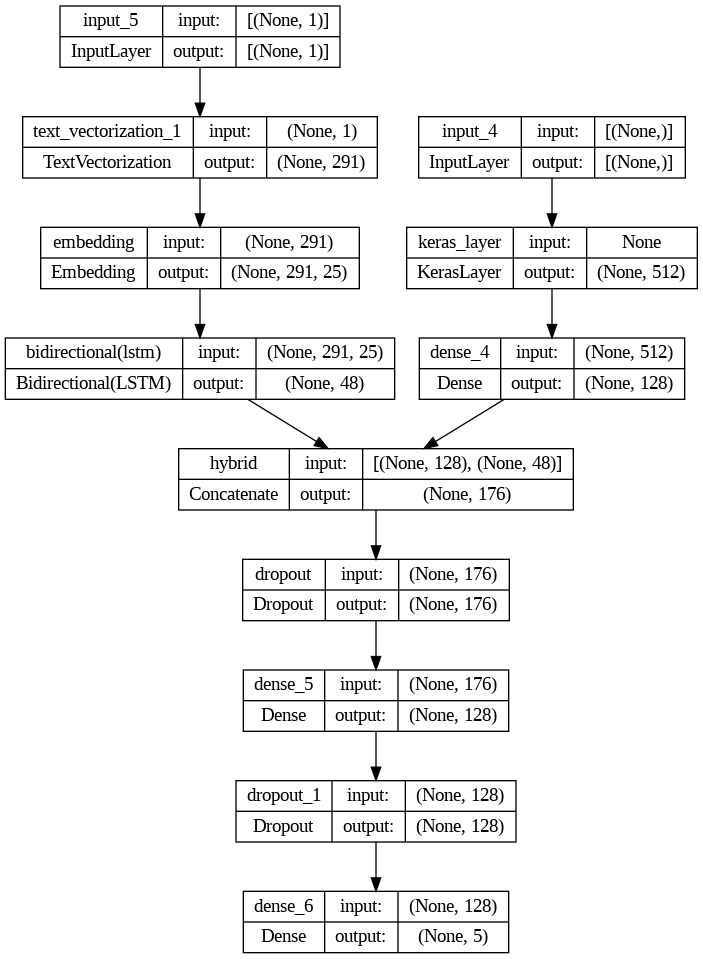

In [69]:
# plot hybrid model
from keras.utils import plot_model
plot_model(model4,show_shapes=True)

In [70]:
model4.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [71]:
#  combining token and character dataset
train_comb_data=tf.data.Dataset.from_tensor_slices((train_sentences,train_chars))
# we need to keep in mind that order of input should be same as assigned in model i.e. tokens then characters
train_comb_label=tf.data.Dataset.from_tensor_slices(train_label_encoded)
train_comb_dataset=tf.data.Dataset.zip((train_comb_data,train_comb_label))

train_comb_dataset=train_comb_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [72]:
#  combining token and character dataset
val_comb_data=tf.data.Dataset.from_tensor_slices((val_sentences,val_chars))
val_comb_label=tf.data.Dataset.from_tensor_slices(val_label_encoded)
val_comb_dataset=tf.data.Dataset.zip((val_comb_data,val_comb_label))

val_comb_dataset=val_comb_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [73]:
train_comb_dataset,val_comb_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [74]:
history4=model4.fit(train_comb_dataset,
                    epochs=3,
                    steps_per_epoch=int(0.1*len(train_comb_dataset)),
                    validation_data=val_comb_dataset,
                    validation_steps=int(0.1*len(val_comb_dataset)))

Epoch 1/3
562/562 [==============================] - 39s 51ms/step - loss: 0.9820 - accuracy: 0.6083 - val_loss: 0.7774 - val_accuracy: 0.6985
Epoch 2/3
562/562 [==============================] - 26s 46ms/step - loss: 0.8051 - accuracy: 0.6883 - val_loss: 0.7136 - val_accuracy: 0.7264
Epoch 3/3
562/562 [==============================] - 23s 42ms/step - loss: 0.7802 - accuracy: 0.7023 - val_loss: 0.6961 - val_accuracy: 0.7354


In [75]:
y_pred4=model4.predict(val_comb_dataset)
model4_preds=tf.argmax(y_pred4,axis=1)
model4_results=result(val_label_encode,model4_preds)
model4_results

945/945 [==============================] - 21s 19ms/step


{'accuracy': 73.29206937640672,
 'precision': 0.7333511640785756,
 'reacall': 0.7329206937640672,
 'f1-score': 0.7309137168194934}

>> ### Model5: token + character + positional embeddings

In [76]:
train_df
#  any engineered features used to train a model need to be available at test time. In our case, line numbers and total lines are available

,line_number,target,text,total_lines
0,0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,12
1,1,METHODS,a total of @ patients with primary knee oa wer...,12
2,2,METHODS,outcome measures included pain reduction and i...,12
3,3,METHODS,pain was assessed using the visual analog pain...,12
4,4,METHODS,secondary outcome measures included the wester...,12
...,...,...,...,...
180035,7,RESULTS,for the absolute change in percent atheroma vo...,12
180036,8,RESULTS,"for pav , a significantly greater percentage o...",12
180037,9,RESULTS,both strategies had acceptable side effect pro...,12
180038,10,CONCLUSIONS,"compared with standard statin monotherapy , th...",12


In [77]:
train_df.line_number.value_counts()
# one hot encoding only till 15 to reduce the data size

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

In [78]:
np.percentile(train_df.line_number,98)

15.0

In [79]:
train_line_no=tf.one_hot(train_df['line_number'].to_numpy(),depth=15)
val_line_no=tf.one_hot(val_df['line_number'].to_numpy(),depth=15)
test_line_no=tf.one_hot(test_df['line_number'].to_numpy(),depth=15)
train_line_no[:30]

<tf.Tensor: shape=(30, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [80]:
# hot encoding total lines column
train_df.total_lines.value_counts()

12    24468
11    23639
13    22113
10    19400
14    18438
15    14610
9     12285
16    10768
8      7464
17     7429
18     5202
7      3353
19     3344
20     2480
21     1281
6      1146
22      770
23      759
24      264
5       215
25      200
26      182
27       81
29       58
4        32
31       31
28       28
Name: total_lines, dtype: int64

<Axes: ylabel='Frequency'>

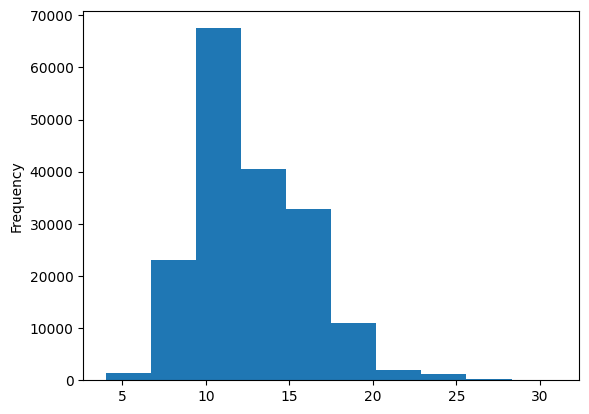

In [81]:
train_df.total_lines.plot.hist()

In [82]:
np.percentile(train_df.total_lines,97)

20.0

In [83]:
train_total_lines=tf.one_hot(train_df["total_lines"].to_numpy(),depth=20)
test_total_lines=tf.one_hot(test_df["total_lines"].to_numpy(),depth=20)
val_total_lines=tf.one_hot(val_df["total_lines"].to_numpy(),depth=20)
train_total_lines

<tf.Tensor: shape=(180040, 20), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [84]:
train_total_lines[0]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [85]:
token_inputs=layers.Input(shape=[],dtype="string")
token_embed=hub_layer(token_inputs)
token_outputs=layers.Dense(128,activation="relu")(token_embed)
token_model=tf.keras.Model(token_inputs,token_outputs)

char_inputs=layers.Input(shape=(1,),dtype="string")
char_vector=char_vectorizer(char_inputs)
char_embedding=char_embed(char_vector)
char_outputs=layers.Bidirectional(layers.LSTM(24))(char_embedding)
char_model=tf.keras.Model(char_inputs,char_outputs)

# line number model: for this dense layer kind of acts as a embedding layer, infact embeddings are dense fitted layers only
line_no_inputs=layers.Input(shape=(15,),dtype=tf.float32)
x=layers.Dense(32,activation="relu")(line_no_inputs)
line_no_model=tf.keras.Model(line_no_inputs,x)

# total lines model
total_lines_inputs=layers.Input(shape=(20,),dtype=tf.float32)
y=layers.Dense(32,activation="relu")(total_lines_inputs)
total_lines_model=tf.keras.Model(total_lines_inputs,y)

# combine token and char embeddings
combo_embed=layers.Concatenate(name="char_token")([token_model.output,char_model.output])
z=layers.Dense(256,activation="relu")(combo_embed)
z=layers.Dropout(0.5)(z)

# combine position with combo_embed embeddings
tribrid_embed=layers.Concatenate(name="tribrid")([line_no_model.output,total_lines_model.output,z])
output_layer=layers.Dense(5,activation="softmax")(tribrid_embed)
model5=tf.keras.Model(inputs=[line_no_model.input,total_lines_model.input,token_model.input,char_model.input],outputs=output_layer)

In [86]:
model5.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 text_vectorization_1 (TextVect  (None, 291)         0           ['input_7[0][0]']                
 orization)                                                                                       
                                                                                                  
 keras_layer (KerasLayer)       (None, 512)          256797824   ['input_6[0][0]']         

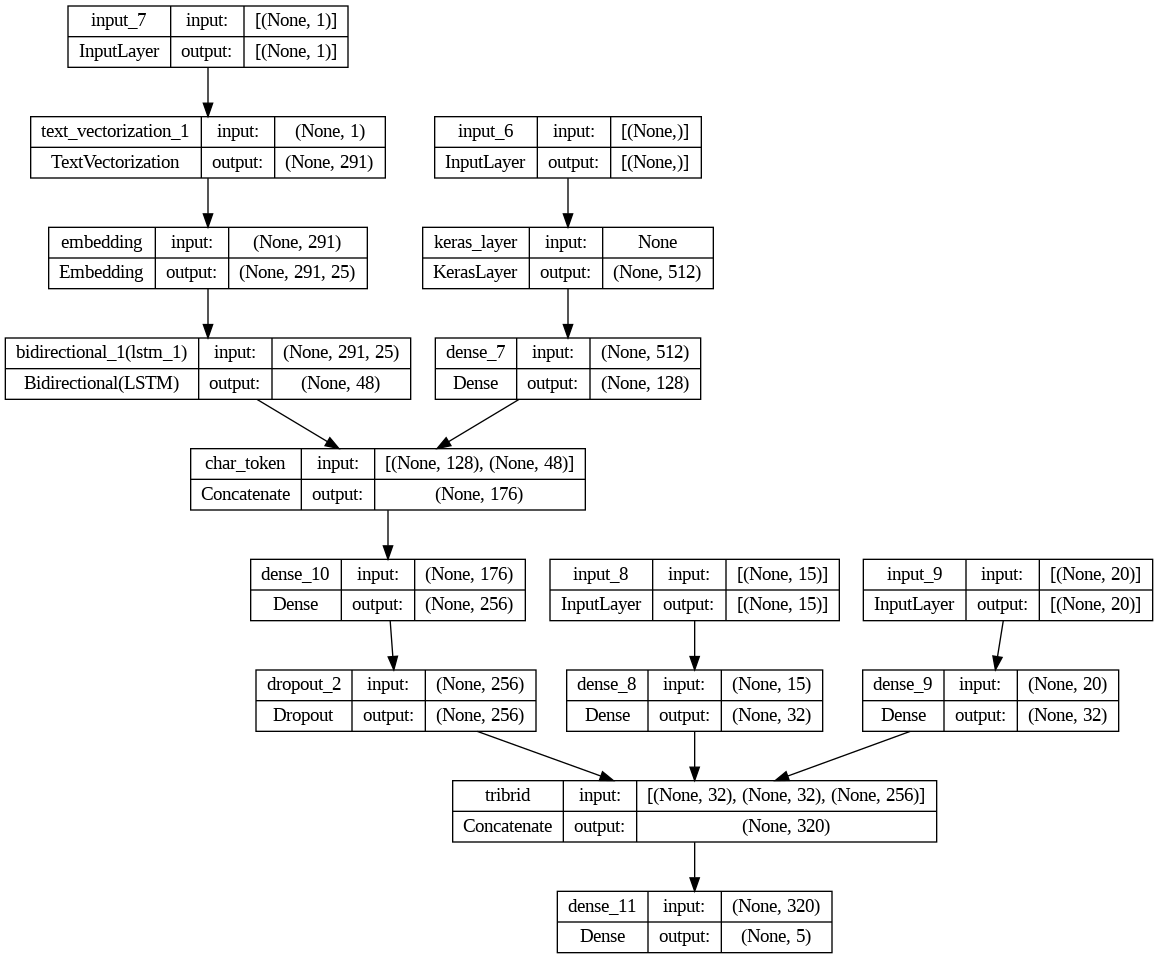

In [87]:
plot_model(model5,show_shapes=True)

In [88]:
for layer in model5.layers:
  print(layer.name, layer.trainable)

input_7 True
input_6 True
text_vectorization_1 True
keras_layer False
embedding True
dense_7 True
bidirectional_1 True
char_token True
input_8 True
input_9 True
dense_10 True
dense_8 True
dense_9 True
dropout_2 True
tribrid True
dense_11 True


In [90]:
model5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
               optimizer="adam",
               metrics=["accuracy"])

>> **This final model of ours has token embedding pretrained and is frozen i.e. it is not updated as the model trains while the character embedding layer is trainable**

>> **Label_smoothing**: When > 0, label values are smoothed, meaning the confidence on label values are relaxed. It is used to reduce overfiting. Label smoothing helps to regularize our model (prevent overfitting) by making sure it doesn't get too focused on applying one particular label to a sample

In [91]:
train_4_data=tf.data.Dataset.from_tensor_slices((train_line_no,train_total_lines,train_sentences,train_chars))
train_4_labels=tf.data.Dataset.from_tensor_slices(train_label_encoded)
train_4_dataset=tf.data.Dataset.zip((train_4_data,train_4_labels))
train_4_dataset=train_4_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_4_data=tf.data.Dataset.from_tensor_slices((val_line_no,val_total_lines,val_sentences,val_chars))
val_4_labels=tf.data.Dataset.from_tensor_slices(val_label_encoded)
val_4_dataset=tf.data.Dataset.zip((val_4_data,val_4_labels))
val_4_dataset=val_4_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_4_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [92]:
history5=model5.fit(train_4_dataset,
                    validation_data=val_4_dataset,
                    epochs=3,
                    steps_per_epoch=int(0.1*len(train_4_dataset)),
                    validation_steps=int(0.1*len(val_4_dataset)))

Epoch 1/3
562/562 [==============================] - 41s 54ms/step - loss: 1.0941 - accuracy: 0.7274 - val_loss: 0.9790 - val_accuracy: 0.8019
Epoch 2/3
562/562 [==============================] - 27s 48ms/step - loss: 0.9668 - accuracy: 0.8145 - val_loss: 0.9483 - val_accuracy: 0.8308
Epoch 3/3
562/562 [==============================] - 24s 42ms/step - loss: 0.9513 - accuracy: 0.8217 - val_loss: 0.9366 - val_accuracy: 0.8338


In [93]:
y_pred5=model5.predict(val_4_dataset)
model5_preds=tf.argmax(y_pred5,axis=1)
model5_results=result(val_label_encode,model5_preds)
model5_results

945/945 [==============================] - 21s 19ms/step


{'accuracy': 83.4866940288627,
 'precision': 0.8339119056560915,
 'reacall': 0.8348669402886271,
 'f1-score': 0.8340460230320882}

In [96]:
# compare model results
compare=pd.DataFrame({
    "baseline_model":model0_results,
    "model1_custom_token_embedding":model1_results,
    "model2_pretrained_token_embedding":model2_results,
    "model3_custom_char_embedding":model3_results,
    "model4_hybrid_embedding":model4_results,
    "model5_tribrid_embedding":model5_results
})
compare=compare.transpose()
compare

,accuracy,precision,reacall,f1-score
baseline_model,72.183238,0.718647,0.721832,0.698925
model1_custom_token_embedding,78.683967,0.783460,0.786840,0.784150
model2_pretrained_token_embedding,71.064478,0.711941,0.710645,0.707925
model3_custom_char_embedding,65.963855,0.657745,0.659639,0.649122
model4_hybrid_embedding,73.292069,0.733351,0.732921,0.730914
model5_tribrid_embedding,83.486694,0.833912,0.834867,0.834046


In [97]:
compare["accuracy"]=compare["accuracy"]/100

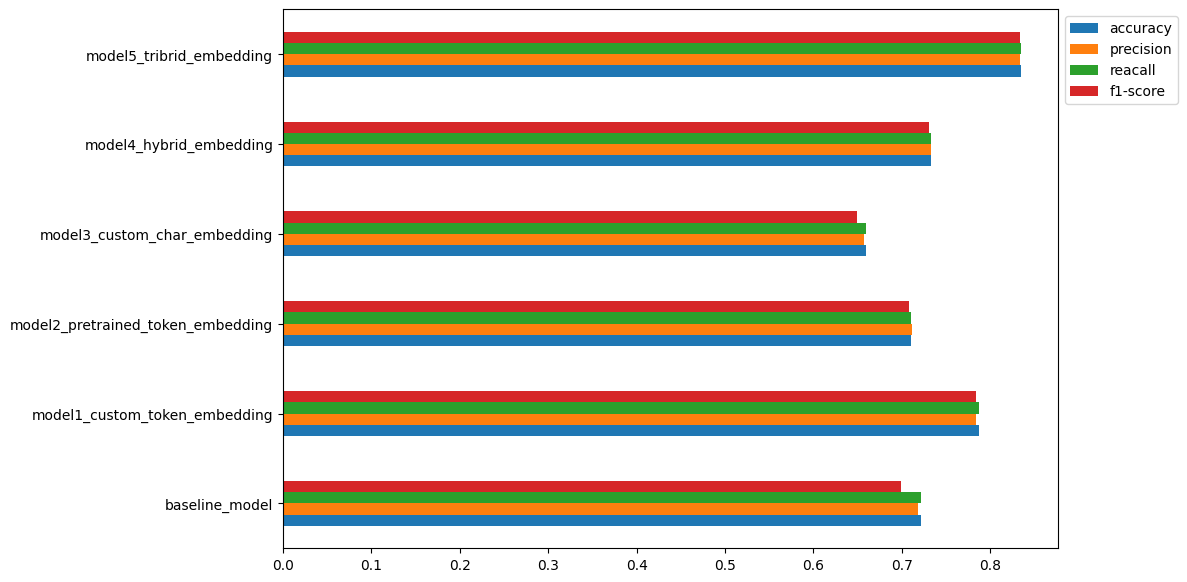

In [98]:
compare.plot(kind="barh",figsize=(10,7)).legend(bbox_to_anchor=(1,1)) # to set legend out of the plot

<Axes: >

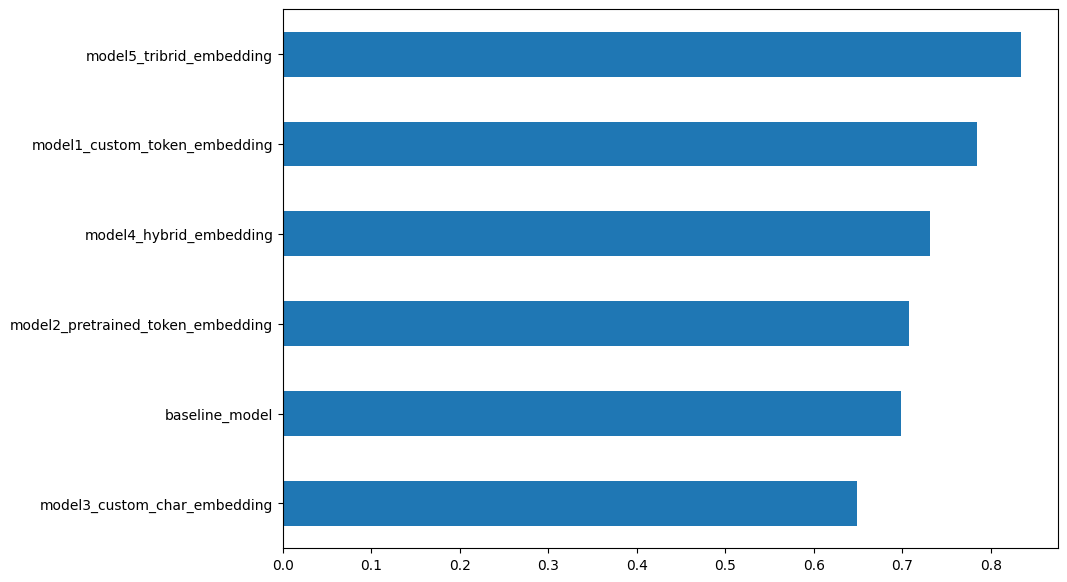

In [100]:
compare.sort_values("f1-score",ascending=True)["f1-score"].plot(kind="barh",figsize=(10,7))

In [101]:
model5.save("skimlit_tribrid")

>> ### Evaluating model on test data

In [102]:
test_4_data=tf.data.Dataset.from_tensor_slices((test_line_no,test_total_lines,test_sentences,test_chars))
test_4_labels=tf.data.Dataset.from_tensor_slices(test_label_encoded)
test_4_dataset=tf.data.Dataset.zip((test_4_data,test_4_labels))
test_4_dataset=test_4_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [103]:
y_pred=model5.predict(test_4_dataset)
test_preds=tf.argmax(y_pred,axis=1)
test_results=result(test_label_encode,test_preds)
test_results

942/942 [==============================] - 21s 22ms/step


{'accuracy': 82.84055085448814,
 'precision': 0.8270532191352411,
 'reacall': 0.8284055085448814,
 'f1-score': 0.8274384037705341}

In [105]:
pred_classes=[encoder.classes_[pred] for pred in test_preds]
pred_classes[:10]

['OBJECTIVE',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'RESULTS',
 'BACKGROUND']

In [106]:
test_df["prediction"]=pred_classes
test_df["pred_prob"]=tf.reduce_max(y_pred,axis=1)
test_df["correct"]=test_df["prediction"]==test_df["target"]
test_df

,line_number,target,text,total_lines,prediction,pred_prob,correct
0,0,BACKGROUND,this study analyzed liver function abnormaliti...,9,OBJECTIVE,0.518164,False
1,1,RESULTS,a post hoc analysis was conducted with the use...,9,BACKGROUND,0.356388,False
2,2,RESULTS,liver function tests ( lfts ) were measured at...,9,METHODS,0.738829,False
3,3,RESULTS,survival analyses were used to assess the asso...,9,METHODS,0.660468,False
4,4,RESULTS,the percentage of patients with abnormal lfts ...,9,RESULTS,0.727961,True
...,...,...,...,...,...,...,...
30130,13,RESULTS,there was a statistically significant between-...,18,RESULTS,0.834844,True
30131,14,RESULTS,there were no statistically significant betwee...,18,RESULTS,0.720557,True
30132,15,RESULTS,there was no significant association between s...,18,RESULTS,0.671709,True
30133,16,RESULTS,no adverse effects were reported .\n,18,RESULTS,0.683877,True


In [107]:
top_wrong=test_df[test_df["correct"]==False].sort_values("pred_prob",ascending=False)[:100]
top_wrong

,line_number,target,text,total_lines,prediction,pred_prob,correct
28602,13,CONCLUSIONS,www.chictr.org registration chictr-trc-@ .\n,14,BACKGROUND,0.959259,False
13874,4,CONCLUSIONS,symptom outcomes will be assessed and estimate...,7,METHODS,0.955843,False
8545,1,METHODS,pretest-posttest .\n,12,BACKGROUND,0.929780,False
2388,4,RESULTS,the primary endpoint is the cumulative three-y...,14,METHODS,0.929488,False
13598,6,METHODS,-@ % vs. fish : -@ % vs. fish + s : -@ % ; p <...,10,RESULTS,0.920518,False
...,...,...,...,...,...,...,...
8527,2,OBJECTIVE,participants were randomly allocated to a trea...,11,METHODS,0.835354,False
16879,6,RESULTS,"safety evaluations included : adverse events ,...",14,METHODS,0.834039,False
29006,4,RESULTS,intervention group patients received an assess...,15,METHODS,0.833776,False
11814,3,OBJECTIVE,the secondary aim was to assess onset of analg...,17,METHODS,0.833667,False


In [110]:
for row in top_wrong[:10].itertuples():
  _,line_number,target,text,_,prediction,pred_prob,_=row
  print(f"Target: {target}, Pred: {prediction}, Prob: {pred_prob}, Line number: {line_number}\n")
  print(f"Text:\n{text}\n")
  print("-----\n")

Target: CONCLUSIONS, Pred: BACKGROUND, Prob: 0.9592591524124146, Line number: 13

Text:
www.chictr.org registration chictr-trc-@ .


-----

Target: CONCLUSIONS, Pred: METHODS, Prob: 0.9558433294296265, Line number: 4

Text:
symptom outcomes will be assessed and estimates of cost-effectiveness made .


-----

Target: METHODS, Pred: BACKGROUND, Prob: 0.9297803044319153, Line number: 1

Text:
pretest-posttest .


-----

Target: RESULTS, Pred: METHODS, Prob: 0.929487943649292, Line number: 4

Text:
the primary endpoint is the cumulative three-year hiv incidence .


-----

Target: METHODS, Pred: RESULTS, Prob: 0.9205182194709778, Line number: 6

Text:
-@ % vs. fish : -@ % vs. fish + s : -@ % ; p < @ ) but there were no significant differences between groups .


-----

Target: RESULTS, Pred: METHODS, Prob: 0.9197344183921814, Line number: 6

Text:
the primary outcome was to evaluate changes in abdominal and shoulder-tip pain via a @-mm visual analog scale at @ , @ , and @hours postoperativel